In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rc("figure", dpi=150)
mpl.rc("figure", figsize=(4,4))

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'xtick.labelsize':15,
    'ytick.labelsize':15,
    'axes.labelsize':20,
})

import os

In [2]:
# extra stuff
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
import math
from scipy.spatial import cKDTree  # For finding nearest neighbors

# formatting
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  # Sets limits for when to use scientific notation

In [3]:
# List all files in the current directory
dir = '../data.lbm/attempt 01/'
# os.listdir(dir)

# Partícula

In [4]:
particleDf = pd.read_csv(dir+"particlesTrj.csv")
particleDf

,tick,time,particleId,position_x,position_y,velocity_x,velocity_y,angularVelocity
0,0,0.000000,1,-1.000000,0.000000e+00,0.000000,0.000000e+00,0.01
1,10,0.404040,1,-0.999755,5.589544e-19,0.000428,6.161470e-19,0.01
2,20,0.808081,1,-0.999437,1.181325e-18,0.000611,-2.458102e-18,0.01
3,30,1.212121,1,-0.999090,2.945975e-18,0.000694,2.762933e-18,0.01
4,40,1.616162,1,-0.998737,1.381270e-18,0.000731,-8.382842e-18,0.01
...,...,...,...,...,...,...,...,...
144,1440,58.181818,1,-0.950756,-2.323121e-17,0.000900,-3.362207e-18,0.01
145,1450,58.585859,1,-0.950391,-2.328780e-17,0.000900,2.448982e-18,0.01
146,1460,58.989899,1,-0.950027,-2.339698e-17,0.000900,-7.168536e-19,0.01
147,1470,59.393939,1,-0.949663,-2.689497e-17,0.000900,-8.566432e-18,0.01


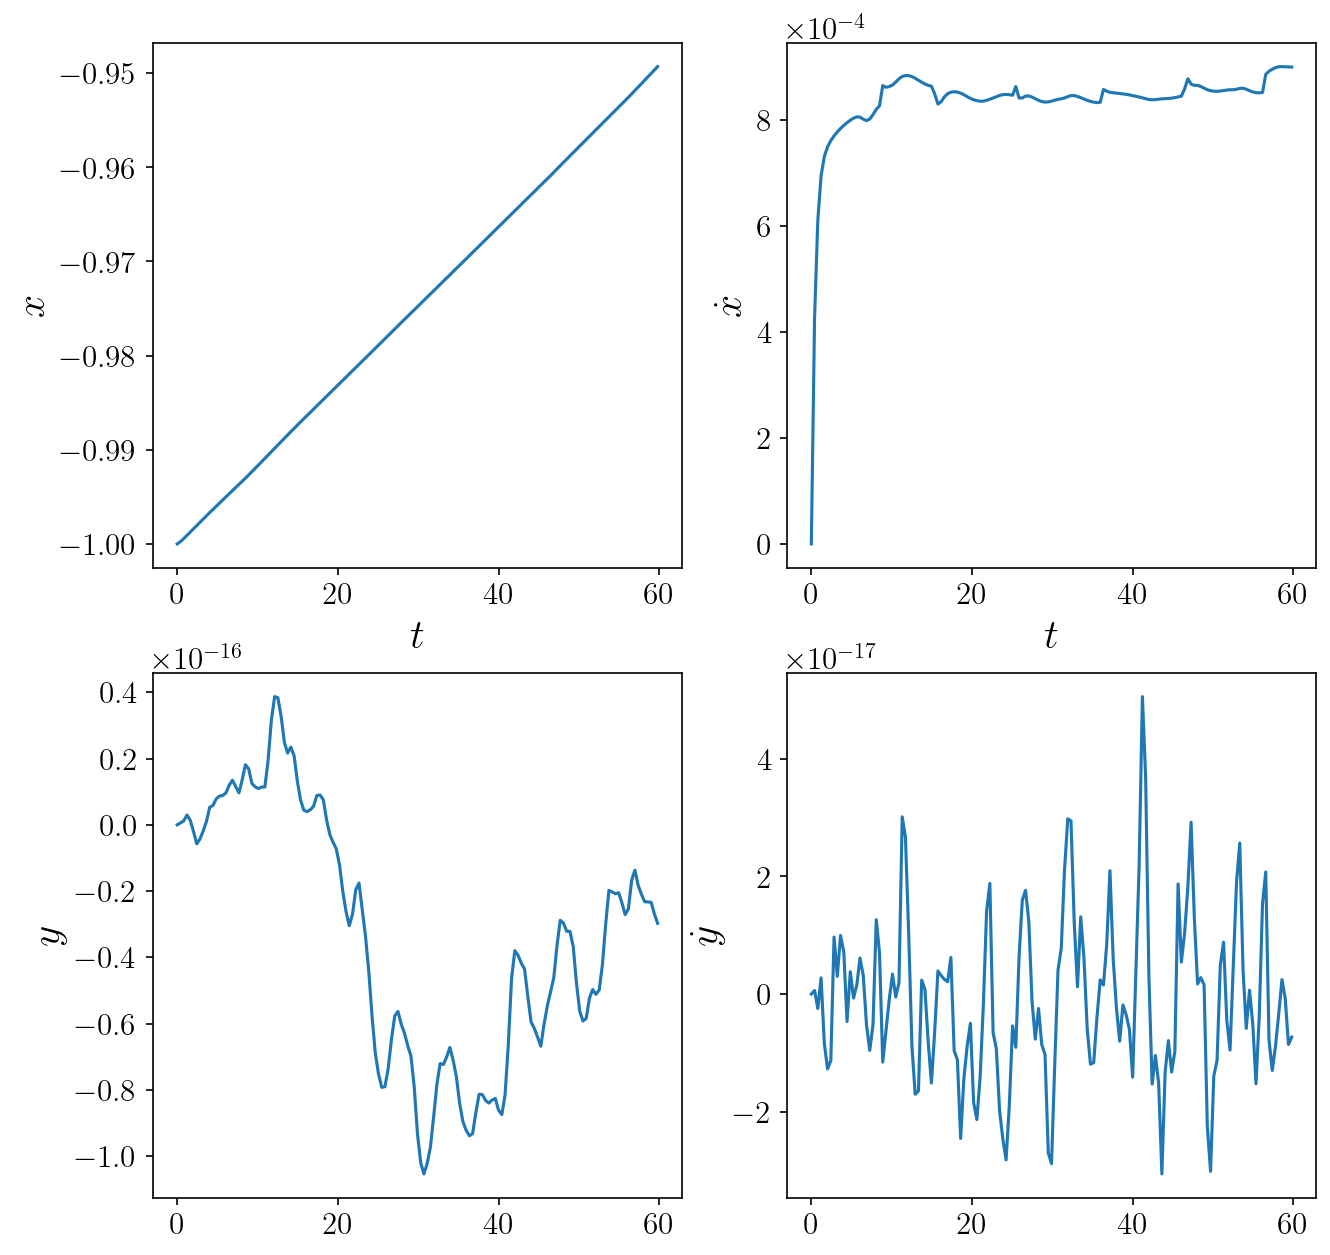

In [5]:
fig, axes = plt.subplots(2,2, figsize = (10,10))

axes[0,0].plot(particleDf.time, particleDf.position_x)
axes[0,0].set_ylabel("$x$")

axes[0,1].plot(particleDf.time, particleDf.velocity_x)
axes[0,1].set_ylabel("$\\dot{x}$")

axes[1,0].plot(particleDf.time, particleDf.position_y)
axes[1,0].set_ylabel("$y$")

axes[1,1].plot(particleDf.time, particleDf.velocity_y)
axes[1,1].set_ylabel("$\\dot{y}$")

for i in range(len(axes)):
    ax = axes.flatten()[i]
    ax.set_xlabel("$t$")
    ax.yaxis.set_major_formatter(formatter)

plt.show()

# Fluido

In [6]:
tick = particleDf.tick.values[-1]
fluidDf = pd.read_csv(dir + f"fluidTrj_{tick}.csv").set_index(["id_x","id_y"]).sort_index()

fluidDf

tick      time  coordinate_x  coordinate_y  massDensity  \
id_x id_y                                                            
1    1     1480  59.79798          -2.0     -2.000000     1.000013   
     2     1480  59.79798          -2.0     -1.959596     1.000013   
     3     1480  59.79798          -2.0     -1.919192     1.000013   
     4     1480  59.79798          -2.0     -1.878788     1.000012   
     5     1480  59.79798          -2.0     -1.838384     1.000011   
...         ...       ...           ...           ...          ...   
100  96    1480  59.79798           2.0      1.838384     1.000011   
     97    1480  59.79798           2.0      1.878788     1.000012   
     98    1480  59.79798           2.0      1.919192     1.000012   
     99    1480  59.79798           2.0      1.959596     1.000013   
     100   1480  59.79798           2.0      2.000000     1.000013   

           fluidVelocity_x  fluidVelocity_y        f1       f2        f3  \
id_x id_y                                                                  
1    1           -0.000007    -2.729966e-07  0.444450  0.11111  0.111115   
     2           -0.000007    -5.395073e-07  0.444450  0.11111  0.111115   
     3           -0.000007    -1.035680e-06  0.444450  0.11111  0.111115   
     4           -0.000007    -1.206823e-06  0.444450  0.11111  0.111115   
     5           -0.000007    -1.569855e-06  0.444450  0.11111  0.111114   
...                    ...              ...       ...      ...       ...   
100  96          -0.000007     1.768585e-06  0.444449  0.11111  0.111115   
     97          -0.000007     1.373153e-06  0.444450  0.11111  0.111115   
     98          -0.000008     1.158178e-06  0.444450  0.11111  0.111115   
     99          -0.000008     6.173029e-07  0.444450  0.11111  0.111115   
     100         -0.000008     2.977967e-07  0.444450  0.11111  0.111115   

                 f4        f5        f6        f7        f8        f9  
id_x id_y                                                              
1    1     0.111113  0.111113  0.027778  0.027779  0.027778  0.027779  
     2     0.111113  0.111113  0.027778  0.027779  0.027778  0.027779  
     3     0.111112  0.111113  0.027777  0.027779  0.027778  0.027779  
     4     0.111112  0.111113  0.027777  0.027779  0.027778  0.027779  
     5     0.111112  0.111113  0.027777  0.027779  0.027778  0.027779  
...             ...       ...       ...       ...       ...       ...  
100  96    0.111113  0.111112  0.027778  0.027779  0.027777  0.027779  
     97    0.111113  0.111112  0.027778  0.027779  0.027777  0.027779  
     98    0.111113  0.111112  0.027778  0.027779  0.027777  0.027779  
     99    0.111113  0.111113  0.027778  0.027779  0.027777  0.027779  
     100   0.111113  0.111113  0.027778  0.027779  0.027777  0.027779  

[10000 rows x 16 columns]

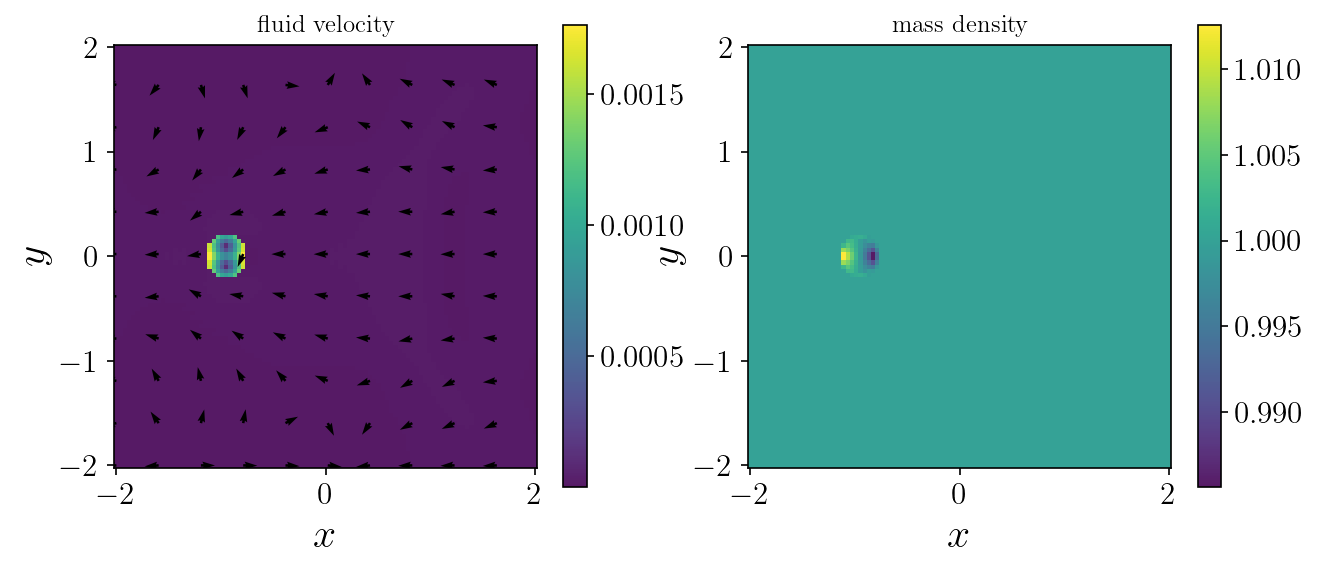

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

# Create a meshgrid for plotting
x_unique = fluidDf['coordinate_x'].unique()
y_unique = fluidDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

c = axes[0].pcolormesh(X, Y,
    np.sqrt(fluidDf.fluidVelocity_x**2 + fluidDf.fluidVelocity_y**2).unstack().values.transpose(),
    cmap = "viridis", alpha = 0.9
); cs.append(c);
axes[0].set_title('fluid velocity')

# Create a mask for filtering
mask = (fluidDf['coordinate_x'].isin(x_unique[::10])) & (fluidDf['coordinate_y'].isin(y_unique[::10])) & (
    (fluidDf.fluidVelocity_x**2 + fluidDf.fluidVelocity_y**2 > 1e-15)
)
# Filter the DataFrame
filtered_df = fluidDf[mask]

axes[0].quiver(
    filtered_df['coordinate_x'], 
    filtered_df['coordinate_y'], 
    (filtered_df.fluidVelocity_x / np.sqrt(filtered_df.fluidVelocity_x**2 + filtered_df.fluidVelocity_y**2)),
    (filtered_df.fluidVelocity_y / np.sqrt(filtered_df.fluidVelocity_x**2 + filtered_df.fluidVelocity_y**2)),
    scale = 30,
)

c = axes[1].pcolormesh(X,Y,
    fluidDf.massDensity.unstack().values.transpose(),
    vmin=min(fluidDf.massDensity.values),
    cmap = "viridis", alpha = 0.9
); cs.append(c);
axes[1].set_title('mass density')

for i in range(2):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    fig.colorbar(c, ax=ax, shrink=.8)  # 'shrink' adjusts the size, 'aspect' adjusts width

plt.show()

# Tensor de estrés

In [8]:
stressDf = pd.read_csv(dir + "stressTensor.csv").set_index(["id_x","id_y"]).sort_index()

stressDf

tick  time  coordinate_x  coordinate_y  component_xx  component_yx  \
id_x id_y                                                                       
1    1     1485  60.0          -2.0     -2.000000  2.453101e-07  7.957347e-09   
     2     1485  60.0          -2.0     -1.959596  2.437349e-07  2.267997e-08   
     3     1485  60.0          -2.0     -1.919192  2.407608e-07  3.737307e-08   
     4     1485  60.0          -2.0     -1.878788  2.367083e-07  4.974293e-08   
     5     1485  60.0          -2.0     -1.838384  2.319907e-07  6.113134e-08   
...         ...   ...           ...           ...           ...           ...   
100  96    1485  60.0           2.0      1.838384  2.291683e-07 -6.617305e-08   
     97    1485  60.0           2.0      1.878788  2.346142e-07 -5.427929e-08   
     98    1485  60.0           2.0      1.919192  2.392499e-07 -4.105362e-08   
     99    1485  60.0           2.0      1.959596  2.426299e-07 -2.502256e-08   
     100   1485  60.0           2.0      2.000000  2.444130e-07 -8.801836e-09   

           component_xy  component_yy  
id_x id_y                              
1    1     7.957347e-09  5.518705e-09  
     2     2.267997e-08  6.099080e-09  
     3     3.737307e-08  7.329209e-09  
     4     4.974293e-08  9.360657e-09  
     5     6.113134e-08  1.223706e-08  
...                 ...           ...  
100  96   -6.617305e-08 -5.890385e-10  
     97   -5.427929e-08 -5.811813e-09  
     98   -4.105362e-08 -9.804975e-09  
     99   -2.502256e-08 -1.244396e-08  
     100  -8.801836e-09 -1.376365e-08  

[10000 rows x 8 columns]

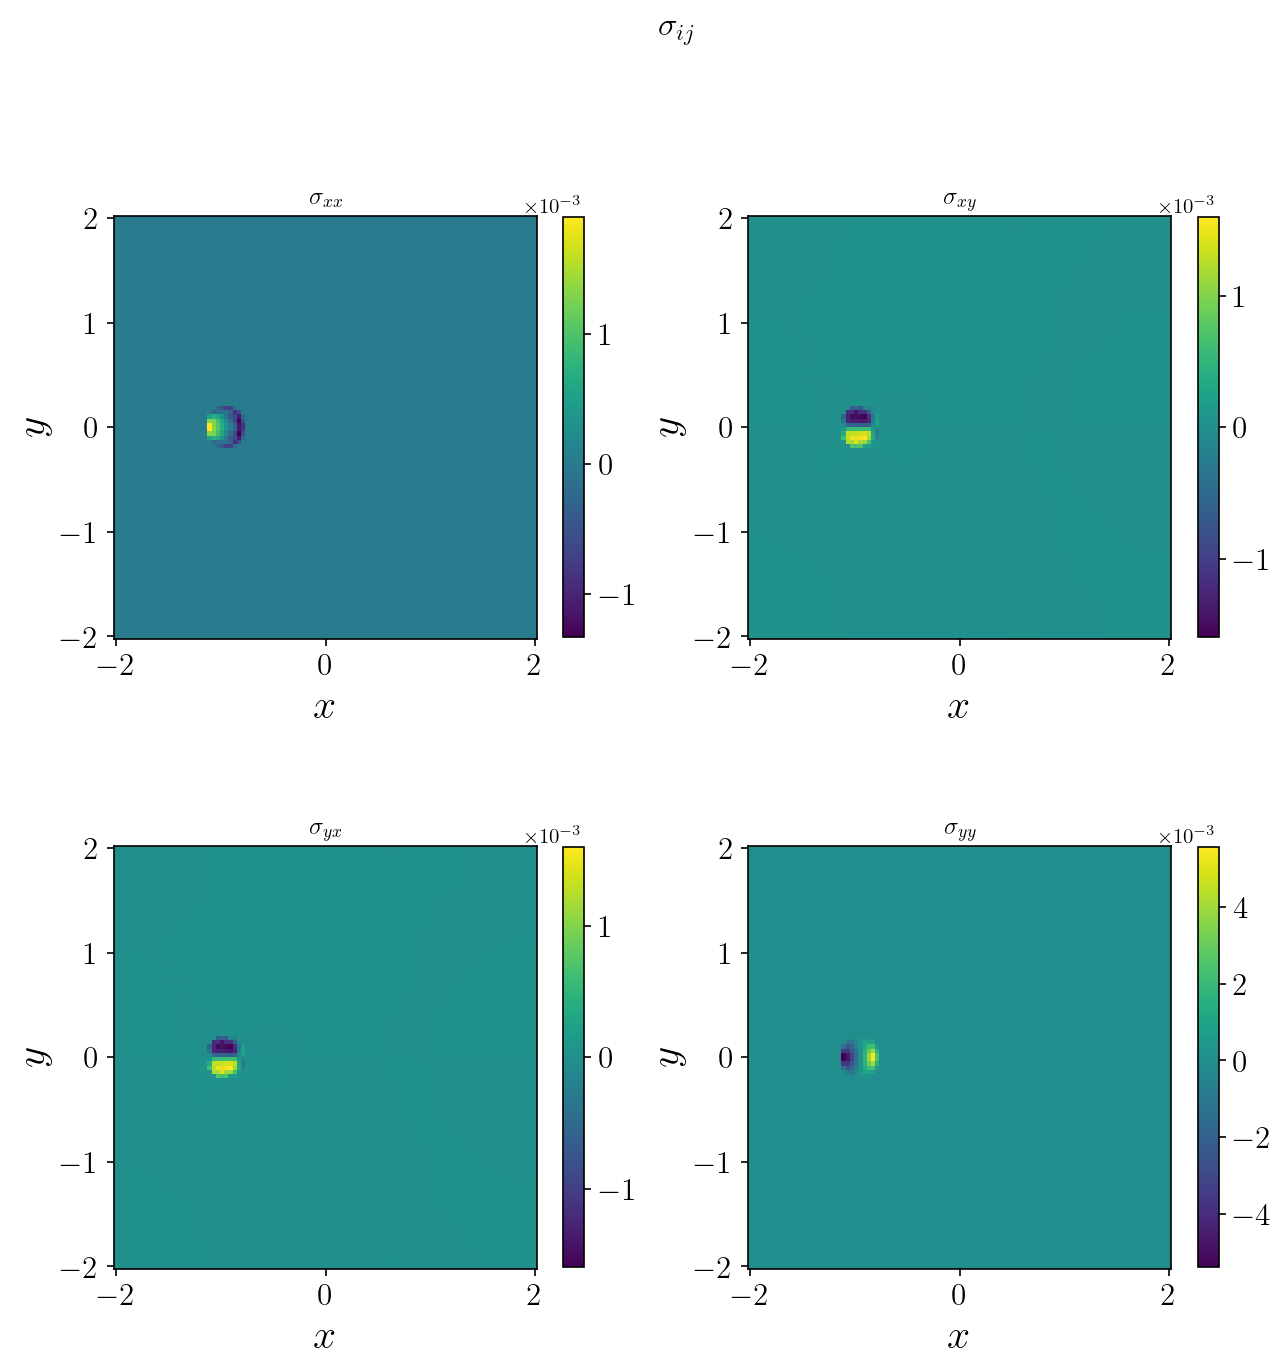

In [10]:
# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("$\\sigma_{ij}$", fontsize=16)

# Create a meshgrid for plotting
x_unique = stressDf['coordinate_x'].unique()
y_unique = stressDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

# plotting
c = axes[0,0].pcolormesh(X,Y,stressDf["component_xx"].unstack().values.transpose()); cs.append(c);
axes[0,0].set_title("$\\sigma_{xx}$")

c = axes[0,1].pcolormesh(X,Y,stressDf["component_xy"].unstack().values.transpose()); cs.append(c);
axes[0,1].set_title("$\\sigma_{xy}$")

c = axes[1,0].pcolormesh(X,Y,stressDf["component_yx"].unstack().values.transpose()); cs.append(c);
axes[1,0].set_title("$\\sigma_{yx}$")

c = axes[1,1].pcolormesh(X,Y,stressDf["component_yy"].unstack().values.transpose()); cs.append(c);
axes[1,1].set_title("$\\sigma_{yy}$")

# formatting
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  # Sets limits for when to use scientific notation

# for ax in axes.flat:
for i in range(4):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")    
    cbar = fig.colorbar(c, ax=ax, shrink=.8)
    cbar.ax.yaxis.set_major_formatter(formatter)
    cbar.ax.yaxis.get_offset_text().set_fontsize(10)  # Adjust the font size if necessary

plt.show()

In [ ]:
# encuentro el primer id_x tal que coordinate_x sea mayor o igual a cero
id = stressDf.query("coordinate_x >= 0").reset_index().iloc[0].filter(["id_x"]).values[0]

# ploteo v_x(y, x = 0)
sigma_x = stressDf.loc[id].filter(["coordinate_y", "component_xx", "component_xy", "component_yx", "component_yy"])


# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("$\\sigma_{ij}$, with " f"$y = {stressDf.query(f"id_x == {id}").iloc[0].filter(["coordinate_x"]).values[0]}$", fontsize=16)

axes[0,0].plot(sigma_x.coordinate_y, sigma_x.component_xx) 
axes[0,0].set_ylabel("$\\sigma_{xx}$")    
axes[0,1].plot(sigma_x.coordinate_y, sigma_x.component_xy) 
axes[0,1].set_ylabel("$\\sigma_{xy}$")    
axes[1,0].plot(sigma_x.coordinate_y, sigma_x.component_yx) 
axes[1,0].set_ylabel("$\\sigma_{yx}$")    
axes[1,1].plot(sigma_x.coordinate_y, sigma_x.component_yy) 
axes[1,1].set_ylabel("$\\sigma_{yy}$")    

for ax in axes.flatten():
    ax.set_xlabel("$y$")
    ax.yaxis.set_major_formatter(formatter)

In [ ]:
# encuentro el primer id_x tal que coordinate_x sea mayor o igual a cero
id = stressDf.query("coordinate_y >= 0").reset_index().iloc[0].filter(["id_y"]).values[0]

sigma_y = stressDf.query(f"id_y == {id}").filter(["coordinate_x", "component_xx", "component_xy", "component_yx", "component_yy"])


# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("$\\sigma_{ij}$, with " f"$y = {stressDf.query(f"id_y == {id}").iloc[0].filter(["coordinate_y"]).values[0]}$", fontsize=16)

axes[0,0].plot(sigma_y.coordinate_x, sigma_y.component_xx) 
axes[0,0].set_ylabel("$\\sigma_{xx}$")    
axes[0,1].plot(sigma_y.coordinate_x, sigma_y.component_xy) 
axes[0,1].set_ylabel("$\\sigma_{xy}$")    
axes[1,0].plot(sigma_y.coordinate_x, sigma_y.component_yx) 
axes[1,0].set_ylabel("$\\sigma_{yx}$")    
axes[1,1].plot(sigma_y.coordinate_x, sigma_y.component_yy) 
axes[1,1].set_ylabel("$\\sigma_{yy}$")    

for ax in axes.flatten():
    ax.set_xlabel("$x$")
    ax.yaxis.set_major_formatter(formatter)
    ax.axvspan(-0.4, 0.4, color='purple', alpha=0.15)  # Shade the sphere

In [ ]:
# encuentro el primer id_x tal que coordinate_x sea mayor o igual a cero
id = stressDf.query("coordinate_y >= 0").reset_index().iloc[0].filter(["id_y"]).values[0]

sigma_y = stressDf.query(f"id_y == {id}").filter(["coordinate_x", "component_xx", "component_xy", "component_yx", "component_yy"])


# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("$\\sigma_{ij}$, with " f"$y = {stressDf.query(f"id_y == {id}").iloc[0].filter(["coordinate_y"]).values[0]}$", fontsize=16)

axes[0,0].plot(sigma_y.coordinate_x, sigma_y.component_xx) 
axes[0,0].set_ylabel("$\\sigma_{xx}$")    
axes[0,1].plot(sigma_y.coordinate_x, sigma_y.component_xy) 
axes[0,1].set_ylabel("$\\sigma_{xy}$")    
axes[1,0].plot(sigma_y.coordinate_x, sigma_y.component_yx) 
axes[1,0].set_ylabel("$\\sigma_{yx}$")    
axes[1,1].plot(sigma_y.coordinate_x, sigma_y.component_yy) 
axes[1,1].set_ylabel("$\\sigma_{yy}$")    

for ax in axes.flatten():
    ax.set_xlabel("$x$")
    ax.yaxis.set_major_formatter(formatter)
    ax.axvspan(-0.4, 0.4, color='purple', alpha=0.15)  # Shade the sphere

In [ ]:
# Create points on the unit circle
radius = 0.4
theta = np.linspace(0, 2*np.pi, 1000)  # 1000 points around the circle
circle_x = radius * np.cos(theta)
circle_y = radius * np.sin(theta)

# Use a k-d tree to find the nearest vector field data points for each circle point
# tree = cKDTree(stressDf[['coordinate_x', 'coordinate_y']].values)
tree = cKDTree(fluidDf[['coordinate_x', 'coordinate_y']].values)
_, idx = tree.query(np.c_[circle_x, circle_y])

In [ ]:
# sanity check
# Extract the corresponding velocities
vel_x = fluidDf['fluidVelocity_x'].values[idx]
vel_y = fluidDf['fluidVelocity_y'].values[idx]

# Compute the magnitude of the vector field
magnitude = np.sqrt(vel_x**2 + vel_y**2)

# setting up stuff
fig, axes = plt.subplots(1,3,figsize = (15,5))

# Add a title for the whole figure
fig.suptitle("velocity along the circumference")

axes[0].plot(theta, vel_x) 
axes[0].set_ylabel("velocity")    
axes[0].set_title("$u_x$")    
axes[1].plot(theta, vel_y) 
axes[1].set_title("$u_y$")    
axes[2].plot(theta, magnitude) 
axes[2].set_title("$|u|$")    

for ax in axes.flatten():
    ax.set_xlabel("$\\theta$")
    ax.yaxis.set_major_formatter(formatter)
#     ax.axvspan(-0.4, 0.4, color='purple', alpha=0.15)  # Shade the sphere

plt.show()

In [ ]:
# stress tensor
# Extract the corresponding velocities
sigma_xx = stressDf['component_xx'].values[idx]
sigma_xy = stressDf['component_xy'].values[idx]
sigma_yx = stressDf['component_yx'].values[idx]
sigma_yy = stressDf['component_yy'].values[idx]

# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("stress tensor along the circumference")

axes[0,0].plot(theta, sigma_xx) 
axes[0,0].set_ylabel("$\\sigma_{xx}$")    
axes[0,1].plot(theta, sigma_xy) 
axes[0,1].set_ylabel("$\\sigma_{xy}$")    
axes[1,0].plot(theta, sigma_yx) 
axes[1,0].set_ylabel("$\\sigma_{yx}$")    
axes[1,1].plot(theta, sigma_yy) 
axes[1,1].set_ylabel("$\\sigma_{yy}$")    

for ax in axes.flatten():
    ax.set_xlabel("$\\theta$")
    ax.yaxis.set_major_formatter(formatter)
#     ax.axvspan(-0.4, 0.4, color='purple', alpha=0.15)  # Shade the sphere

plt.show()

In [ ]:
# stress tensor
# Extract the corresponding velocities
sigma_xx = stressDf['component_xx'].values[idx]
sigma_xy = stressDf['component_xy'].values[idx]
sigma_yx = stressDf['component_yx'].values[idx]
sigma_yy = stressDf['component_yy'].values[idx]

baseline = 0.4e-3

# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("stress tensor along the circumference")

axes[0,0].plot((baseline) * np.cos(theta), (baseline) * np.sin(theta)) 
axes[0,0].plot((sigma_xx+baseline) * np.cos(theta), (sigma_xx+baseline) * np.sin(theta)) 
axes[0,0].set_title("$\\sigma_{xx}$")    

axes[0,1].plot((baseline) * np.cos(theta), (baseline) * np.sin(theta)) 
axes[0,1].plot((sigma_xy+baseline) * np.cos(theta), (sigma_xy+baseline) * np.sin(theta)) 
axes[0,1].set_title("$\\sigma_{xy}$")    

axes[1,0].plot((baseline) * np.cos(theta), (baseline) * np.sin(theta)) 
axes[1,0].plot((sigma_yx+baseline) * np.cos(theta), (sigma_yx+baseline) * np.sin(theta)) 
axes[1,0].set_title("$\\sigma_{yx}$")    

axes[1,1].plot((baseline) * np.cos(theta), (baseline) * np.sin(theta)) 
axes[1,1].plot((sigma_yy+baseline) * np.cos(theta), (sigma_yy+baseline) * np.sin(theta)) 
axes[1,1].set_title("$\\sigma_{yy}$")    

for ax in axes.flatten():
#     ax.set_xlabel("$\\theta$")
    ax.yaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_aspect('equal')
#     ax.axvspan(-0.4, 0.4, color='purple', alpha=0.15)  # Shade the sphere

plt.show()

In [ ]:
# \sigma_{ij} r_{i}
# R_x = cos(\theta)x 
# R_y = sin(\theta)y
sigmaDotR_x = sigma_xx * np.cos(theta) + sigma_yx * np.sin(theta)
sigmaDotR_y = sigma_xy * np.cos(theta) + sigma_yy * np.sin(theta)

# setting up stuff
fig, axes = plt.subplots(1,2,figsize = (10,5))

# Add a title for the whole figure
fig.suptitle("dot product between stress tensor and normal vector")

axes[0].plot(theta, sigmaDotR_x) 
axes[0].set_title("$(\\sigma \\cdot N)_x$")    
axes[1].plot(theta, sigmaDotR_y) 
axes[1].set_title("$(\\sigma \\cdot N)_y$")    

for ax in axes.flatten():
    ax.set_xlabel("$\\theta$")
    ax.yaxis.set_major_formatter(formatter)
#     ax.axvspan(-0.4, 0.4, color='purple', alpha=0.15)  # Shade the sphere

plt.show()

In [ ]:
baseline = 3e-4

# setting up stuff
fig, axes = plt.subplots(1,2,figsize = (10,5))

# Add a title for the whole figure
fig.suptitle("dot product between stress tensor and normal vector")

axes[0].plot((baseline) * np.cos(theta), (baseline) * np.sin(theta)) 
axes[0].plot((sigmaDotR_x+baseline) * np.cos(theta), (sigmaDotR_x+baseline) * np.sin(theta)) 
axes[0].set_title("$(\\sigma \\cdot N)_x$")    

axes[1].plot((baseline) * np.cos(theta), (baseline) * np.sin(theta)) 
axes[1].plot((sigmaDotR_y+baseline) * np.cos(theta), (sigmaDotR_y+baseline) * np.sin(theta)) 
axes[1].set_title("$(\\sigma \\cdot N)_y$")    

for ax in axes.flatten():
#     ax.set_xlabel("$\\theta$")
    ax.yaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_aspect('equal')
#     ax.axvspan(-0.4, 0.4, color='purple', alpha=0.15)  # Shade the sphere

plt.show()

In [ ]:
def myInvSqrt(arg):
    sqrtArg = np.sqrt(arg)
    return np.divide(1, sqrtArg, where=(sqrtArg != 0))

# setting up stuff
fig, axes = plt.subplots(1,2,figsize = (10,5))

# Add a title for the whole figure
fig.suptitle("$\\sigma \\cdot N$", fontsize=16)

# Create a meshgrid for plotting
x_unique = stressDf['coordinate_x'].unique()
y_unique = stressDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

# plotting
c = axes[0].pcolormesh(X,Y,
    stressDf["component_xx"].unstack().values.transpose() * X * myInvSqrt(X**2 + Y**2)
    + stressDf["component_yx"].unstack().values.transpose() * Y * myInvSqrt(X**2 + Y**2)
); cs.append(c);
axes[0].set_title("$(\\sigma \\cdot N)_x$")

c = axes[1].pcolormesh(X,Y,
    stressDf["component_xy"].unstack().values.transpose() * X * myInvSqrt(X**2 + Y**2)
    + stressDf["component_yy"].unstack().values.transpose() * Y * myInvSqrt(X**2 + Y**2)
); cs.append(c);
axes[1].set_title("$(\\sigma \\cdot N)_y$")

# formatting
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  # Sets limits for when to use scientific notation

# for ax in axes.flat:
for i in range(2):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")    
    cbar = fig.colorbar(c, ax=ax, shrink=.8)
    cbar.ax.yaxis.set_major_formatter(formatter)
    cbar.ax.yaxis.get_offset_text().set_fontsize(10)  # Adjust the font size if necessary
    ax.axhline(wallPosition, color = "k")
    ax.axhspan(-2, wallPosition, color='gray', alpha=0.5)  # Shade the wall

plt.show()

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (10,5))

# Create a meshgrid for plotting
x_unique = fluidDf['coordinate_x'].unique()
y_unique = fluidDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

c = axes[0].pcolormesh(X,Y,
    np.sqrt(fluidDf.fluidVelocity_x**2 + fluidDf.fluidVelocity_y**2).unstack().values.transpose(),
); cs.append(c);
axes[0].set_title('fluid speed')

c = axes[1].pcolormesh(X,Y,
    fluidDf.massDensity.unstack().values.transpose(),
    vmin=0.999
); cs.append(c);
axes[1].set_title('mass density')


for i in range(2):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    fig.colorbar(c, ax=ax, shrink=.8)  # 'shrink' adjusts the size, 'aspect' adjusts width


plt.show()

In [ ]:
plt.plot(v_x.coordinate_y, v_x.fluidVelocity_x) 
plt.axvspan(-0.4, 0.4, color='purple', alpha=0.15)  # Shade the sphere
plt.axvspan(-2, wallPosition, color='gray', alpha=0.5)  # Shade the wall

In [ ]:
h = v_x.coordinate_y.values[1] - v_x.coordinate_y.values[0]

dvx_dy = [
    (v_x.fluidVelocity_x.values[id + 1] - v_x.fluidVelocity_x.values[id])/h
for id in range(len(v_x.fluidVelocity_x.values)-1)]


plt.plot(v_x.coordinate_y.values[:-1], dvx_dy)
plt.axvspan(-0.4, 0.4, color='purple', alpha=0.15)  # Shade the sphere
plt.axvspan(-2, wallPosition, color='gray', alpha=0.5)  # Shade the wall

In [ ]:
# setting up stuff
fig, axes = plt.subplots(1,2,figsize = (10,5))

axes[0].plot(v_x.coordinate_y.values[:-1], dvx_dy)
axes[0].set_ylabel("$\\partial v_x / \\partial y$")    
axes[1].plot(sigma_x.coordinate_y, sigma_x.component_xy) 
axes[1].set_ylabel("$\\sigma_{xy}$")    
for ax in axes.flatten():
    ax.set_xlabel("$y$")
    ax.yaxis.set_major_formatter(formatter)
    ax.axvline(wallPosition, color = "k")
    ax.axvspan(-2, wallPosition, color='gray', alpha=0.5)  # Shade the wall
    ax.axvspan(-0.4, 0.4, color='purple', alpha=0.15)  # Shade the sphere